In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Get the playing history from 11/14/2021 to 11/14/2023
import csv
file_path = './Apple-Music-Play-History-100.csv'

# Read the CSV file directly into a DataFrame
df = pd.read_csv(file_path, delimiter=';')

# Display the DataFrame
display(df)
display(df.info)


,Country,Track Identifier,Media type,Date Played,Hours,Play Duration Milliseconds,End Reason Type,Source Type,Play Count,Skip Count,Ignore For Recommendations,Track Reference,Track Description
0,Turkey,880713901,AUDIO,20211114,"1, 10, 14",1529979,NATURAL_END_OF_TRACK,IPHONE,3,0,False,8.807139e+08,Wiener Philharmoniker & Carlos Kleiber - Symph...
1,Turkey,1480784971,AUDIO,20211114,1,740129,NATURAL_END_OF_TRACK,IPHONE,2,1,False,1.480785e+09,"Max Richter, Louisa Fuller, Natalia Bonner, Jo..."
2,Turkey,662324540,AUDIO,20211114,"15, 18, 19",633079,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,IPHONE,2,1,False,6.623245e+08,Nas - Life's a Bitch (feat. AZ & Olu Dara)
3,Turkey,1187249361,AUDIO,20211114,15,571838,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,IPHONE,1,1,False,1.187249e+09,Big Sean - Sacrifices (feat. Migos)
4,Turkey,594180924,AUDIO,20211114,15,283946,NATURAL_END_OF_TRACK,IPHONE,1,0,False,5.941809e+08,Arthur Rubinstein - Nocturne No. 19 in E Minor...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37822,Turkey,587098510,AUDIO,20231114,17,0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,IPHONE,0,1,False,5.870985e+08,Teoman - Güzel Bir Gün
37823,Turkey,1254351757,AUDIO,20231114,17,0,TRACK_SKIPPED_FORWARDS,IPHONE,0,1,False,NaN,21 Savage - Bank Account
37824,Turkey,310505597,AUDIO,20231114,18,0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,IPHONE,0,1,False,3.105056e+08,Michael Jackson - You Are Not Alone
37825,Turkey,1710685796,AUDIO,20231114,17,0,MANUALLY_SELECTED_PLAYBACK_OF_A_DIFF_ITEM,IPHONE,0,1,False,1.710686e+09,Drake - Bahamas Promises


<bound method DataFrame.info of       Country  Track Identifier Media type  Date Played       Hours  \
0      Turkey         880713901      AUDIO     20211114   1, 10, 14   
1      Turkey        1480784971      AUDIO     20211114           1   
2      Turkey         662324540      AUDIO     20211114  15, 18, 19   
3      Turkey        1187249361      AUDIO     20211114          15   
4      Turkey         594180924      AUDIO     20211114          15   
...       ...               ...        ...          ...         ...   
37822  Turkey         587098510      AUDIO     20231114          17   
37823  Turkey        1254351757      AUDIO     20231114          17   
37824  Turkey         310505597      AUDIO     20231114          18   
37825  Turkey        1710685796      AUDIO     20231114          17   
37826  Turkey        1597888600      AUDIO     20231114          17   

       Play Duration Milliseconds                            End Reason Type  \
0                         1529979  

In [3]:
# Get the tracks data from json file
import json

# Assuming your JSON file is named 'your_file.json'
with open('tracks.json', 'r') as json_file:
    data = json.load(json_file)

# Create a new dictionary to store the desired information
library_tracks_dict = {}

# Iterate through the array of dictionaries
for entry in data:
    track_id = entry.get("Apple Music Track Identifier")
    artist = entry.get("Artist")
    album = entry.get("Album")
    genre = entry.get("Genre")

    # Check if the required fields are present
    if track_id is not None and artist is not None and album is not None and genre is not None:
        # Create a sub-dictionary with artist, album, and genre
        sub_dict = {"Artist": artist, "Album": album, "Genre": genre}

        # Add the sub-dictionary to the result_dict with track_id as the key
        library_tracks_dict[track_id] = sub_dict

# Display the resulting dictionary
print(library_tracks_dict)


{481652479: {'Artist': 'Kanye West', 'Album': 'The College Dropout', 'Genre': 'Hip-Hop/Rap'}, 1184984775: {'Artist': 'Eminem', 'Album': 'The Eminem Show', 'Genre': 'Hip-Hop/Rap'}, 633037499: {'Artist': 'Eminem', 'Album': 'Recovery', 'Genre': 'Hip-Hop/Rap'}, 1109772165: {'Artist': 'Drake', 'Album': 'Views', 'Genre': 'Hip-Hop/Rap'}, 774845086: {'Artist': 'Eminem', 'Album': 'Encore (Deluxe)', 'Genre': 'Hip-Hop/Rap'}, 633037507: {'Artist': 'Eminem', 'Album': 'Recovery', 'Genre': 'Hip-Hop/Rap'}, 774796707: {'Artist': 'Eminem', 'Album': 'Curtain Call', 'Genre': 'Hip-Hop/Rap'}, 1184984680: {'Artist': 'Eminem', 'Album': 'The Eminem Show', 'Genre': 'Hip-Hop/Rap'}, 102100423: {'Artist': 'Eminem', 'Album': 'Curtain Call: The Hits', 'Genre': 'Hip-Hop/Rap'}, 774796706: {'Artist': 'Eminem', 'Album': 'Curtain Call', 'Genre': 'Hip-Hop/Rap'}, 774796710: {'Artist': 'Eminem', 'Album': 'Curtain Call', 'Genre': 'Hip-Hop/Rap'}, 99021906: {'Artist': 'Eminem', 'Album': 'Curtain Call: The Hits', 'Genre': 'Hip-

----------------------------------------------------------------------------
* Most played song in last 2 years is Father Time (feat. Sampha) by Kendrick Lamar with a total of 116 play counts
* Second most played song in last 2 years is Magnolia by Playboi Carti with a total of 88 play counts
* Third most played song in last 2 years is N95 by Kendrick Lamar with a total of 85 play counts

----------------------------------------------------------------------------
* Most played album in last 2 years is Mr. Morale & The Big Steppers by Kendrick Lamar with a total of 717 play counts
* Second most played album in last 2 years is Donda by Kanye West with a total of 364 play counts
* Third most played album in last 2 years is UTOPIA by Travis Scott with a total of 363 play counts

----------------------------------------------------------------------------
{0: 723, 1: 350, 2: 255, 3: 158, 4: 611, 5: 1201, 6: 975, 7: 1371, 8: 1920, 9: 1840, 10: 1725, 11: 2127, 12: 2222, 13: 1909, 14: 2137, 1

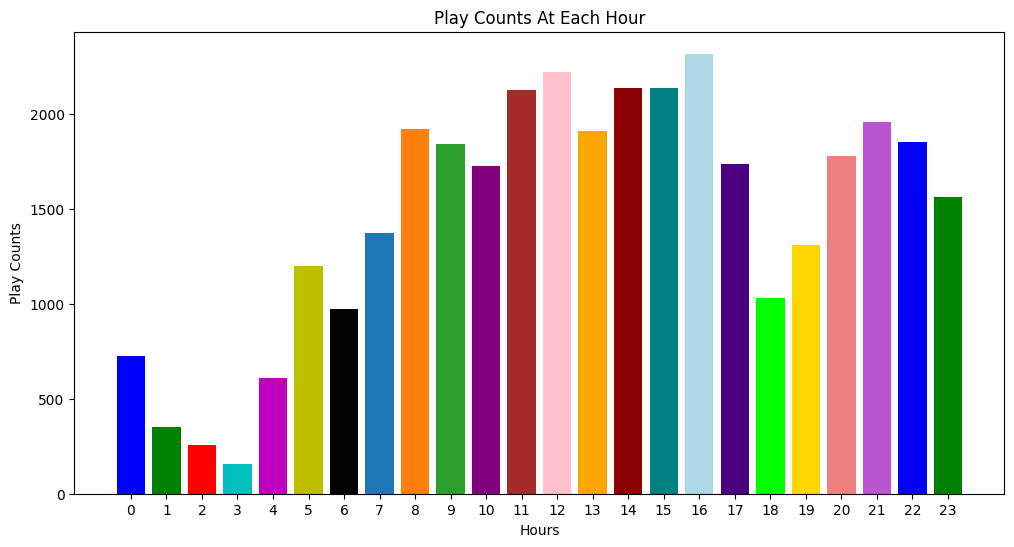

In [15]:
import re
import heapq


# Define the regex pattern
pattern = re.compile(r'^(?P<artist>.*?) - (?P<song>.*)$')

played_tracks_dict = {}
played_albums_dict = {}
play_counts_at_hours = {0:0,1:0,2:0,3:0,4:0,5:0,6:0,7:0,8:0,9:0,10:0,11:0,12:0,13:0,14:0,15:0,16:0,17:0,18:0,19:0,20:0,21:0,22:0,23:0}

for index, row in df.iterrows():
    try:
        track_id = row['Track Identifier']
        match = pattern.match(row['Track Description'])
        song_name = match.group('song')
        artist = match.group('artist')
        hours = row['Hours'].split(',')

        # Keep the play counts of the songs
        if song_name not in played_tracks_dict.keys():
            played_tracks_dict[song_name] = {'Total Play Count':int(row['Play Count']),'Artist':artist}
        else:
            played_tracks_dict[song_name]['Total Play Count'] = played_tracks_dict[song_name]['Total Play Count']+int(row['Play Count'])

        # Keep the play counts of the albums
        album = library_tracks_dict[int(track_id)]['Album']
        if album != None:
            if album not in played_albums_dict.keys():
                played_albums_dict[album] = {'Total Play Count':int(row['Play Count']),'Artist':artist}
            else:
                played_albums_dict[album]['Total Play Count'] = played_albums_dict[album]['Total Play Count']+int(row['Play Count'])

        # Keep the play counts at each hour

        for hour in hours:
            play_counts_at_hours[int(hour)] = play_counts_at_hours[int(hour)] + 1
            
    except:
        pass

# Find the top 3 keys with the highest "Play Count"

print('----------------------------------------------------------------------------')
top_3_songs = heapq.nlargest(3, played_tracks_dict, key=lambda k: played_tracks_dict[k]['Total Play Count'])
print(f"* Most played song in last 2 years is {top_3_songs[0]} by {played_tracks_dict[top_3_songs[0]]['Artist']} with a total of {played_tracks_dict[top_3_songs[0]]['Total Play Count']} play counts")
print(f"* Second most played song in last 2 years is {top_3_songs[1]} by {played_tracks_dict[top_3_songs[1]]['Artist']} with a total of {played_tracks_dict[top_3_songs[1]]['Total Play Count']} play counts")
print(f"* Third most played song in last 2 years is {top_3_songs[2]} by {played_tracks_dict[top_3_songs[2]]['Artist']} with a total of {played_tracks_dict[top_3_songs[2]]['Total Play Count']} play counts")
print()

print('----------------------------------------------------------------------------')
top_3_album = heapq.nlargest(3, played_albums_dict, key=lambda k: played_albums_dict[k]['Total Play Count'])
print(f"* Most played album in last 2 years is {top_3_album[0]} by {played_albums_dict[top_3_album[0]]['Artist']} with a total of {played_albums_dict[top_3_album[0]]['Total Play Count']} play counts")
print(f"* Second most played album in last 2 years is {top_3_album[1]} by {played_albums_dict[top_3_album[1]]['Artist']} with a total of {played_albums_dict[top_3_album[1]]['Total Play Count']} play counts")
print(f"* Third most played album in last 2 years is {top_3_album[2]} by {played_albums_dict[top_3_album[2]]['Artist']} with a total of {played_albums_dict[top_3_album[2]]['Total Play Count']} play counts")
print()

print('----------------------------------------------------------------------------')
print(play_counts_at_hours)

keys = list(play_counts_at_hours.keys())
values = list(play_counts_at_hours.values())

# Create a column graph
colors = [
    'b', 'g', 'r', 'c', 'm', 'y', 'k',   # Basic colors
    '#1f77b4', '#ff7f0e', '#2ca02c',      # Hexadecimal RGB values
    'purple', 'brown', 'pink', 'orange',  # Named colors
    'darkred', 'teal', 'lightblue', 'indigo',  # Additional colors
    'lime', 'gold', 'lightcoral', 'mediumorchid'  # More colors
]

plt.subplots(figsize=(12, 6))
plt.bar(keys, values, color=colors)

plt.xlabel('Hours')
plt.ylabel('Play Counts')
plt.title('Play Counts At Each Hour')
plt.xticks(keys)

plt.show()